In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_dict = dict()
for fp in glob('data/*.csv'):
    df = pd.read_csv(fp)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    ticker = re.findall('(?<=/)(.*)(?=.(US|CC))', fp)[0][0]
    df_dict[ticker] = df

In [22]:
sr_dict = dict()
for ticker,df in df_dict.items():
    df = df.copy()
    sr = df['Adjusted_close']
    sr_dict[ticker] =  sr / sr.shift(1) - 1

df = pd.DataFrame(sr_dict)
df = df.fillna(0)
df_ret = df
display(df.head(5))

sr_dict = dict()
for ticker,df in df_dict.items():
    df = df.copy()
    sr = df['Volume']
    sr_dict[ticker] =  sr / sr.shift(1) - 1

df = pd.DataFrame(sr_dict)
df = df.fillna(0)
df_volume = df
display(df.head(5))

TLT       XLP       XLF  GLD       XLV       XLB  XLRE  UUP  \
Date                                                                      
1998-12-22  0.0  0.000000  0.000000  0.0  0.000000  0.000000   0.0  0.0   
1998-12-23  0.0  0.024177 -0.916160  0.0  0.022474  0.010501   0.0  0.0   
1998-12-24  0.0 -0.001730  0.006773  0.0  0.006106  0.023012   0.0  0.0   
1998-12-28  0.0 -0.005767 -0.013447  0.0 -0.014566 -0.008710   0.0  0.0   
1998-12-29  0.0  0.022041  0.011004  0.0  0.022170  0.018307   0.0  0.0   

                 XLE       XLI  XTL       XLK       XLY       XLU  
Date                                                               
1998-12-22  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  
1998-12-23  0.020813  0.017449  0.0  0.023889  0.004296 -0.004191  
1998-12-24 -0.005259  0.013197  0.0 -0.003806  0.018324  0.018415  
1998-12-28 -0.005295  0.005209  0.0  0.002866 -0.008997 -0.005166  
1998-12-29  0.009976  0.014245  0.0  0.002858  0.021792  0.016618

TLT       XLP       XLF  GLD       XLV       XLB  XLRE  UUP  \
Date                                                                      
1998-12-22  0.0  0.000000  0.000000  0.0  0.000000  0.000000   0.0  0.0   
1998-12-23  0.0 -0.707252  0.409692  0.0  2.175439 -0.631579   0.0  0.0   
1998-12-24  0.0  0.034091 -0.443750  0.0 -0.729282  1.142857   0.0  0.0   
1998-12-28  0.0 -0.441758  0.185393  0.0  2.163265  0.666667   0.0  0.0   
1998-12-29  0.0  3.862205  0.940758  0.0 -0.658065 -0.960000   0.0  0.0   

                 XLE       XLI  XTL       XLK       XLY       XLU  
Date                                                               
1998-12-22  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  
1998-12-23  3.460526  0.500000  0.0  0.125790  2.243243  2.050633  
1998-12-24 -0.818584  0.555556  0.0 -0.279633 -0.866667 -0.012448  
1998-12-28  0.097561  4.285714  0.0  0.269183  4.375000 -0.869748  
1998-12-29  0.629630 -0.810811  0.0 -0.599741 -0.872093  2.870968

In [23]:
# df = df_ret.copy()
# df = df[df.index>='20050101']
# df = df[df.index<='20191231']
# df.columns = [f'asset{i}' for i,col in enumerate(df.columns)]
# df.to_csv('return_is.csv')


# df = df_ret.copy()
# df = df[df.index>='20050101']
# df = df[df.index<='20230331']
# df.columns = [f'asset{i}' for i,col in enumerate(df.columns)]
# df.to_csv('return_oos.csv')

# df = df_volume.copy()
# df = df[df.index>='20050101']
# df = df[df.index<='20191231']
# df.columns = [f'asset{i}' for i,col in enumerate(df.columns)]
# df.to_csv('volume_is.csv')


# df = df_volume.copy()
# df = df[df.index>='20050101']
# df = df[df.index<='20230331']
# df.columns = [f'asset{i}' for i,col in enumerate(df.columns)]
# df.to_csv('volume_oos.csv')



In [34]:
def compute_weight(df_ret, df_volume):
    df = df_ret.copy()
    df = pd.DataFrame().reindex_like(df).fillna(1)
    df_w = df
    return df_w

df = compute_weight(df_ret, df_volume)
df_w = df
df

TLT  XLP  XLF  GLD  XLV  XLB  XLRE  UUP  XLE  XLI  XTL  XLK  XLY  \
Date                                                                           
1998-12-22  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1998-12-23  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1998-12-24  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1998-12-28  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1998-12-29  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
...         ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   
2023-03-29  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2023-03-30  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2023-03-31  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2023-04-03  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2023-04-04  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   

            XLU  
Date             
1998-12-22  1.0  
1998-12-23  1.0  
1998-12-24  1.0  
1998-12-28  1.0  
1998-12-29  1.0  
...         ...  
2023-03-29  1.0  
2023-03-30  1.0  
2023-03-31  1.0  
2023-04-03  1.0  
2023-04-04  1.0  

[6112 rows x 14 columns]

In [81]:
def compute_weight(df_ret, df_volume):
    df = df_ret.copy()
    df = df.shift(0)
    df = df.rolling(252,min_periods=1).mean()
    df_w = df
    return df_w

df_w1 = compute_weight(df_ret, df_volume)
df_w2 = compute_weight(df_ret.iloc[:-63], df_volume.iloc[:-63]).iloc[63:]

df = df_w1
df = df.loc[df_w2.index]
df_w1 = df

df_w1.equals(df_w2)

True

<AxesSubplot:xlabel='Date'>

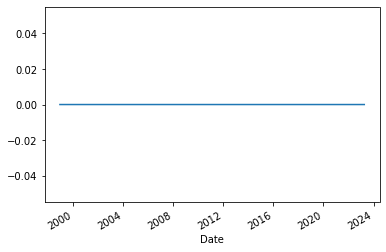

In [33]:
df = df_w.apply(lambda x: x/x.abs().sum() if x.abs().sum()>=1 else x, axis=1)
df_w_adj = df

df = df_w_adj.shift(2)*df_ret
sr = df.sum(axis=1)
total_return = sr
total_return.cumsum().plot()

In [83]:
sr.first_valid_index()

Timestamp('1998-12-22 00:00:00')